In [33]:
import matplotlib.pyplot as plt
import matplotlib

font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)

color_c = matplotlib.cm.viridis(0.4)
import numpy as np

In [34]:
import imp

plot = imp.load_source('plot', '../src/plot.py')

In [35]:
color = matplotlib.cm.viridis(0.2)

**Standard tournaments**

In standard tournaments the rates of which a strategy cooperated after mutual defections and mutual cooperation have had an effect on the perfomances. The distributions of the winner in standard tournaments are given bellow.

In [36]:
import pandas as pd

In [37]:
std = pd.read_csv('../data/standard_3_processed.csv', index_col=0)

In [8]:
winners = std[std['Normalized_Rank'] == 0]

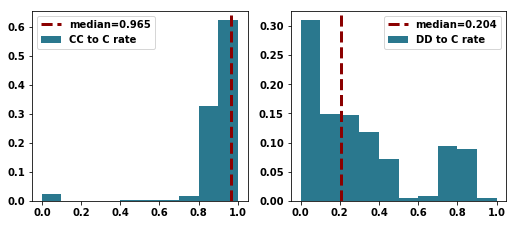

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3.5))

for i, rate in enumerate(['CC_to_C_rate', 'DD_to_C_rate']):

    values = winners[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=color_c, label=rate.replace('_', ' '))
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    
fig.savefig('../images/rates_of_winners_in_standard_tournaments.pdf', bbox_inches='tight')

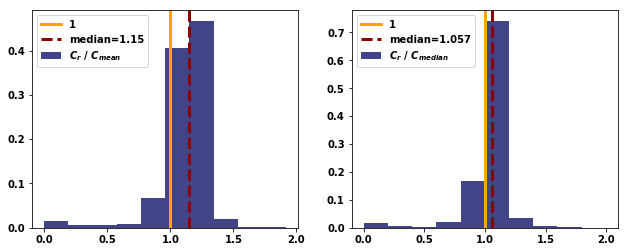

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 4))

for i, rate in enumerate(['Cooperation_rating_comp_to_mean', 'Cooperation_rating_comp_to_median']):

    values = winners[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=color, label=plot.features_labels[rate])
    axes[i].axvline(
        1,
        color="orange",
        linewidth=3,
        label='1'
    )
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    
fig.savefig('../images/compared_to_mean_median_standard.pdf', bbox_inches='tight')

In [12]:
rs = np.linspace(0, 1, 100)

In [13]:
linestyles = ['--', '-', ':']

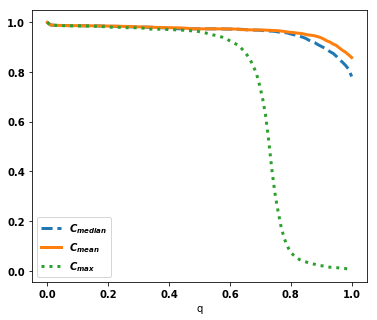

In [14]:
x = winners['Cooperation_rating']

fig, axes = plt.subplots(figsize=(6, 5))

for i, measure in enumerate(['Cooperation_rating_median',
                             'Cooperation_rating_mean',
                             'Cooperation_rating_max']):
    y = winners[measure]
    axes.plot(rs, [sum(x >= r * y) / len(x) for r in rs],
              label=plot.features_labels[measure],
              linewidth=3,
              linestyle=linestyles[i])
    axes.set_xlabel('q')
    axes.legend()
    
fig.savefig('../images/q_distribution_for_standard.pdf',
            bbox_inches='tight')

**noisy tournaments**

In [17]:
noisy = pd.read_csv('../data/noise_3_processed.csv', index_col=0)

In [18]:
winners_noisy = noisy[noisy['Normalized_Rank'] == 0]

In [19]:
titles = ['Noisy tournament', 'Probabilistic ending tournament']

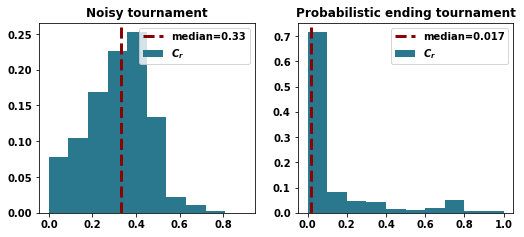

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3.5))

for i, df in enumerate([winners_noisy, winners_probend]):

    values = df['Cooperation_rating']
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=color_c, label=plot.features_labels['Cooperation_rating'])
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    axes[i].set_title(titles[i], fontweight="bold")
    
fig.savefig('../images/c_r_winners_tournaments.pdf', bbox_inches='tight')

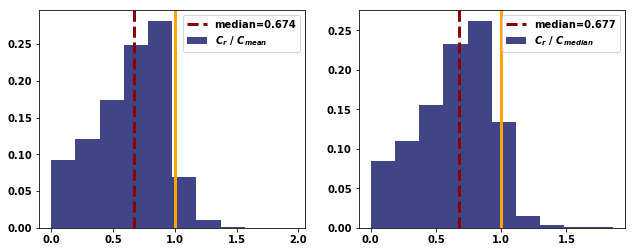

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 4))

for i, rate in enumerate(['Cooperation_rating_comp_to_mean', 'Cooperation_rating_comp_to_median']):

    values = winners_noisy[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=color, label=plot.features_labels[rate])
    axes[i].axvline(
        1,
        color="orange",
        linewidth=3,
    )
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    
fig.savefig('../images/compared_to_mean_median_noisy.pdf', bbox_inches='tight')

**probend**

In [22]:
probend = pd.read_csv('../data/probend_3_processed.csv', index_col=0)

In [23]:
winners_probend = probend[probend['Normalized_Rank'] == 0]

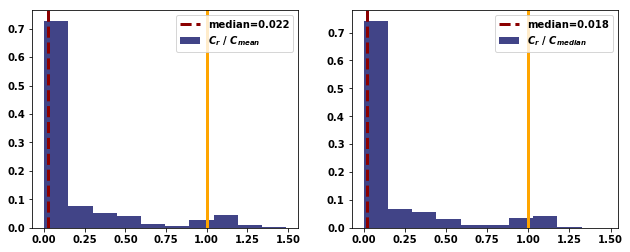

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 4))

for i, rate in enumerate(['Cooperation_rating_comp_to_mean',
                          'Cooperation_rating_comp_to_median']):

    values = winners_probend[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=color, label=plot.features_labels[rate])
    axes[i].axvline(
        1,
        color="orange",
        linewidth=3,
    )
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    
fig.savefig('../images/compared_to_mean_median_probend.pdf', bbox_inches='tight')

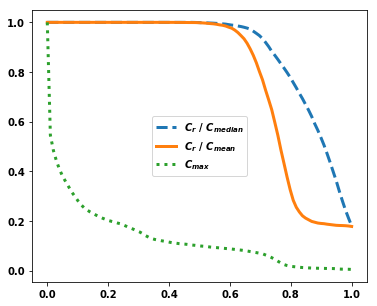

In [25]:
x = winners_probend['Cooperation_rating']

fig, axes = plt.subplots(figsize=(6, 5))

for i, measure in enumerate(['Cooperation_rating_comp_to_median',
                             'Cooperation_rating_comp_to_mean',
                             'Cooperation_rating_max']):
    y = winners_probend[measure]
    axes.plot(rs, [sum(x >= r * y) / len(x) for r in rs],
              label=plot.features_labels[measure],
              linewidth=3,
              linestyle=linestyles[i])
    axes.legend()
    
fig.savefig('../images/q_distribution_for_probend.pdf',
            bbox_inches='tight')

**noisy probabilistic ending**

In [26]:
probend_noisy = pd.read_csv('../data/probend_noise_3_processed.csv', index_col=0)

In [27]:
winners_probend_noisy = probend_noisy[probend_noisy['Normalized_Rank'] == 0]

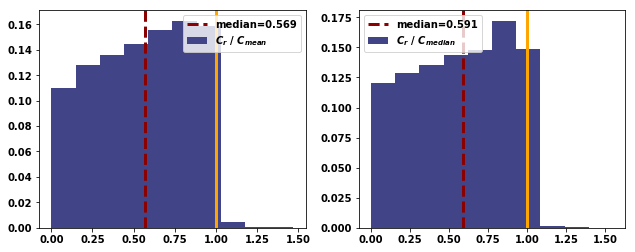

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 4))

for i, rate in enumerate(['Cooperation_rating_comp_to_mean',
                          'Cooperation_rating_comp_to_median']):

    values = winners_probend_noisy[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=color, label=plot.features_labels[rate])
    axes[i].axvline(
        1,
        color="orange",
        linewidth=3,
    )
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    
fig.savefig('../images/compared_to_mean_median_probend_noisy.pdf', bbox_inches='tight')

In [29]:
overall_winners = pd.concat([winners, winners_noisy, winners_probend, winners_probend_noisy])

//anaconda3/envs/axlml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


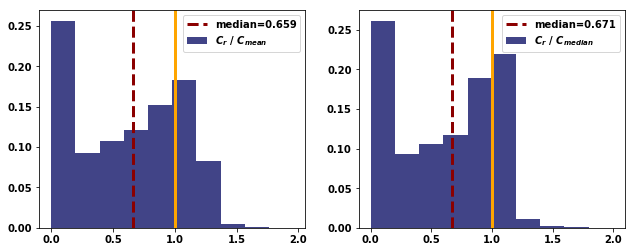

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 4))

for i, rate in enumerate(['Cooperation_rating_comp_to_mean',
                          'Cooperation_rating_comp_to_median']):

    values = overall_winners[rate]
    weights = np.ones_like(values) / float(len(values))
    axes[i].hist(values, weights=weights, color=color, label=plot.features_labels[rate])
    axes[i].axvline(
        1,
        color="orange",
        linewidth=3,
    )
    axes[i].axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(values), 3),
    )
    axes[i].legend();
    
fig.savefig('../images/compared_to_mean_median_overall.pdf', bbox_inches='tight')